In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('train.csv', delimiter=',',skip_header=1)
data.shape

(42000, 785)

In [10]:
# normalize X
X = (data[:,1:]/255).reshape(-1,28,28,1)
# one hot encode y
y = np.zeros(shape=(len(X),10),dtype=int)
y[np.arange(len(data)),data[:,0].astype(int)] = 1

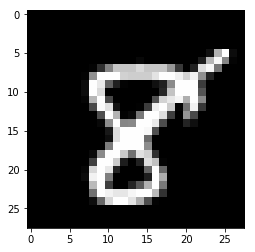

(8, array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]))

In [4]:
# sample image
i = np.random.randint(len(X))
plt.imshow(X[i].reshape(28,28),cmap='gray')
plt.show()
np.argmax(y[i]),y[i]

In [23]:
from keras.models import Model
from keras.layers import Convolution2D, LeakyReLU, BatchNormalization, Flatten
from keras.layers import Dense, Input, Reshape, ReLU, Conv2DTranspose, Activation

In [22]:
input_layer = Input(shape = X[0].shape)
x = Convolution2D(filters=32, kernel_size=(5, 5), strides=(2, 2), padding='same')(input_layer)
x = LeakyReLU(0.2)(x)
x = Convolution2D(filters=64, kernel_size=(5, 5), strides=(2, 2), padding='same')(x)
x = BatchNormalization(momentum=0.5)(x)
x = LeakyReLU(0.2)(x)
x = Convolution2D(filters=128, kernel_size=(5, 5), strides=(2, 2), padding='same')(x)
x = BatchNormalization(momentum=0.5)(x)
x = LeakyReLU(0.2)(x)
x = Flatten()(x)
output = (Dense(1,activation='sigmoid'))(x)

discriminator = Model(inputs=input_layer,outputs=output)
discriminator.compile(loss='binary_crossentropy',optimizer='adam',metrics=None)

discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 32)        832       
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 64)          51264     
_________________________________________________________________
batch_normalization_15 (Batc (None, 7, 7, 64)          256       
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 4, 4, 128)         204928    
__________

In [30]:
input_layer = Input(shape=(1,1,100))
x = Dense(2048)(input_layer)
x = Reshape(target_shape=(4, 4, 128))(x)
x = BatchNormalization(momentum=0.5)(x)
x = ReLU()(x)
x = Conv2DTranspose(filters=64, kernel_size=(5, 5), strides=(2, 2), padding='same')(x)
x = BatchNormalization(momentum=0.5)(x)
x = ReLU()(x)
x = Conv2DTranspose(filters=32, kernel_size=(5, 5), strides=(2, 2), padding='same')(x)
x = BatchNormalization(momentum=0.5)(x)
x = ReLU()(x)
x = Conv2DTranspose(filters=3, kernel_size=(5, 5), strides=(2, 2), padding='same')(x)
x = BatchNormalization(momentum=0.5)(x)
output = Activation('tanh')(x)

generator = Model(inputs = input_layer,outputs = output)
generator.compile(optimizer='adam',loss='binary_crossentropy',metrics=None)
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 1, 1, 100)         0         
_________________________________________________________________
dense_13 (Dense)             (None, 1, 1, 2048)        206848    
_________________________________________________________________
reshape_5 (Reshape)          (None, 4, 4, 128)         0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 4, 4, 128)         512       
_________________________________________________________________
re_lu_10 (ReLU)              (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 8, 8, 64)          204864    
_________________________________________________________________
batch_normalization_31 (Batc (None, 8, 8, 64)          256       
__________